In [39]:
import os
import base64
import io
import json
import numpy as np
import cv2
import PIL.ExifTags
import PIL.Image
import PIL.ImageOps
import matplotlib.pyplot as plt
from skimage import measure
from skimage import filters
from skimage.measure import label, regionprops

In [76]:
def img_data_to_arr(img_data):
    f = io.BytesIO()
    f.write(img_data)
    img_arr = np.array(PIL.Image.open(f))
    return img_arr

def img_b64_to_arr(img_b64):
    img_data = base64.b64decode(img_b64)
    img_arr = img_data_to_arr(img_data)
    return img_arr

def img_arr_to_b64(img_arr):
    img_pil = PIL.Image.fromarray(img_arr)
    f = io.BytesIO()
    img_pil.save(f, format='PNG')
    img_bin = f.getvalue()
    if hasattr(base64, 'encodebytes'):
        img_b64 = base64.encodebytes(img_bin)
    else:
        img_b64 = base64.encodestring(img_bin)
    return img_b64

def get_label_label_list(mask, label):
    lll = []
    array = mask == label
    array = remove_small_blobs(array)
    
    array = array.astype(float)
    label_mask = measure.label(array)

    blob_labels = np.unique(label_mask)
    for blob in blob_labels:
        if blob != 0:
            blob_mask = label_mask == blob
            
            lll.append({'label': str(label), 
            'line_color': None, 
            'fill_color': None,
             'points': get_label_polygon(mask=blob_mask)}) 
    return lll

def get_label_polygon(mask=None):
    from imantics import Polygons, Mask

    polygons = Mask(mask).polygons()
    return polygons.points[0].tolist()

def remove_small_blobs(mask):
    label_img = label(mask)
    rp = regionprops(label_img.astype(np.uint8))
    for prop in rp:    
        if prop.area < 250:
            label_img[label_img == prop.label] = 0
    
    # set all non zero regions to true
    label_img[label_img != 0] = 1
    return label_img
    
def create_model_json(record_name, mask, img):
    test_json = {}
    test_json['version'] = '3.6.12'
    test_json['flags'] = {}

    label_list = []

    for label in [2, 3, 6, 1]:
        label_list = label_list + get_label_label_list(mask, label)

    test_json['shapes'] = label_list
    test_json['lineColor'] = [0, 255, 0, 128]
    test_json['fillColor'] = [255, 0, 0, 128]
    test_json['imagePath'] = record_name + ".png"
    test_json['imageData'] = img_arr_to_b64(img).decode('utf-8')
    test_json['imageHeight'] = img.shape[0]
    test_json['imageWidth'] = img.shape[1]
    return test_json


def save_model_json(test_json, save_dir):
    with open(save_dir, 'w') as fp:
        json.dump(test_json, fp, indent=4)

In [77]:
example_dir = "/media/olle/Seagate/LODE/workspace/new_samples/inter_doctor_variance_sample/33116_R_20180703"

record_name = "33116_R_20180703_2"
img_dir = os.path.join(example_dir, record_name + ".png")
mask_dir = os.path.join(example_dir, "segmentation", record_name + ".npy")
save_dir = os.path.join(example_dir, record_name + "_model.json")

img = cv2.imread(img_dir, -1) #img_b64_to_arr(data["imageData"])
mask = np.load(mask_dir)

shape = img.shape

# resize prediction
img = cv2.resize(img, (mask.shape[0:2]),  interpolation=cv2.INTER_NEAREST)

test_json = create_model_json(record_name, mask, img)
save_model_json(test_json, save_dir)

In [72]:
shape[1]

512

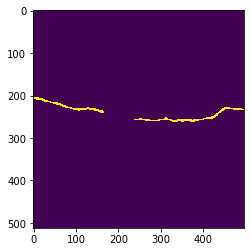

In [64]:
image = mask == 6
label_img = label(image)
rp = regionprops(label_img.astype(np.uint8))
for prop in rp:    
    if prop.area < 500:
        label_img[label_img == prop.label] = 0
        


plt.imshow(label_img)

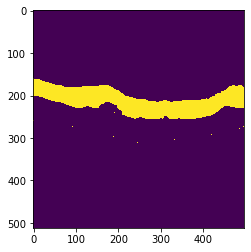

In [49]:
plt.imshow(label_img.astype(np.uint8))

In [30]:
np.unique(mask)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
      dtype=uint8)

In [84]:
test_json

{'version': '3.6.12',
 'flags': {},
 'shapes': [{'label': 2,
   'line_color': None,
   'fill_color': None,
   'points': [[0, 105],
    [0, 177],
    [7, 177],
    [8, 178],
    [11, 178],
    [12, 179],
    [23, 179],
    [24, 180],
    [27, 180],
    [28, 181],
    [29, 181],
    [30, 182],
    [31, 182],
    [32, 183],
    [36, 183],
    [37, 184],
    [40, 184],
    [41, 185],
    [52, 185],
    [53, 186],
    [66, 186],
    [67, 187],
    [73, 187],
    [74, 188],
    [84, 188],
    [85, 189],
    [91, 189],
    [92, 190],
    [97, 190],
    [98, 191],
    [112, 191],
    [113, 192],
    [117, 192],
    [118, 193],
    [129, 193],
    [130, 194],
    [134, 194],
    [135, 195],
    [157, 195],
    [158, 196],
    [162, 196],
    [163, 197],
    [178, 197],
    [179, 198],
    [182, 198],
    [183, 199],
    [187, 199],
    [188, 200],
    [211, 200],
    [212, 199],
    [238, 199],
    [239, 198],
    [249, 198],
    [250, 197],
    [259, 197],
    [260, 198],
    [298, 198],
    [

In [62]:
data

{'version': '3.6.10',
 'flags': {},
 'shapes': [{'label': '2',
   'line_color': None,
   'fill_color': None,
   'points': [[1, 106],
    [6, 105],
    [15, 107],
    [26, 106],
    [39, 109],
    [52, 110],
    [65, 111],
    [74, 112],
    [87, 112],
    [97, 112],
    [108, 111],
    [128, 108],
    [142, 108],
    [157, 108],
    [175, 108],
    [190, 111],
    [205, 116],
    [220, 122],
    [230, 127],
    [239, 132],
    [245, 136],
    [255, 141],
    [262, 145],
    [270, 144],
    [276, 143],
    [283, 138],
    [297, 132],
    [309, 127],
    [322, 124],
    [333, 123],
    [345, 120],
    [357, 120],
    [367, 120],
    [376, 120],
    [389, 122],
    [403, 125],
    [416, 128],
    [433, 133],
    [450, 138],
    [462, 142],
    [479, 147],
    [490, 150],
    [496, 153],
    [502, 153],
    [510, 156],
    [510, 214],
    [501, 213],
    [492, 211],
    [479, 209],
    [469, 207],
    [459, 205],
    [453, 205],
    [447, 204],
    [439, 204],
    [432, 202],
    [422, 199

In [91]:
test_json

{'version': '3.6.12',
 'flags': {},
 'shapes': [{'label': 2,
   'line_color': None,
   'fill_color': None,
   'points': [[0, 105],
    [0, 177],
    [7, 177],
    [8, 178],
    [11, 178],
    [12, 179],
    [23, 179],
    [24, 180],
    [27, 180],
    [28, 181],
    [29, 181],
    [30, 182],
    [31, 182],
    [32, 183],
    [36, 183],
    [37, 184],
    [40, 184],
    [41, 185],
    [52, 185],
    [53, 186],
    [66, 186],
    [67, 187],
    [73, 187],
    [74, 188],
    [84, 188],
    [85, 189],
    [91, 189],
    [92, 190],
    [97, 190],
    [98, 191],
    [112, 191],
    [113, 192],
    [117, 192],
    [118, 193],
    [129, 193],
    [130, 194],
    [134, 194],
    [135, 195],
    [157, 195],
    [158, 196],
    [162, 196],
    [163, 197],
    [178, 197],
    [179, 198],
    [182, 198],
    [183, 199],
    [187, 199],
    [188, 200],
    [211, 200],
    [212, 199],
    [238, 199],
    [239, 198],
    [249, 198],
    [250, 197],
    [259, 197],
    [260, 198],
    [298, 198],
    [

In [48]:
import numpy as np


# This can be any array
array = np.ones((100, 100))

array = mask == 2

array = array.astype(float)

polygons = Mask(array).polygons()

print(polygons.points)
print(polygons.segmentation)

[array([[  0, 105],
       [  0, 177],
       [  7, 177],
       [  8, 178],
       [ 11, 178],
       [ 12, 179],
       [ 23, 179],
       [ 24, 180],
       [ 27, 180],
       [ 28, 181],
       [ 29, 181],
       [ 30, 182],
       [ 31, 182],
       [ 32, 183],
       [ 36, 183],
       [ 37, 184],
       [ 40, 184],
       [ 41, 185],
       [ 52, 185],
       [ 53, 186],
       [ 66, 186],
       [ 67, 187],
       [ 73, 187],
       [ 74, 188],
       [ 84, 188],
       [ 85, 189],
       [ 91, 189],
       [ 92, 190],
       [ 97, 190],
       [ 98, 191],
       [112, 191],
       [113, 192],
       [117, 192],
       [118, 193],
       [129, 193],
       [130, 194],
       [134, 194],
       [135, 195],
       [157, 195],
       [158, 196],
       [162, 196],
       [163, 197],
       [178, 197],
       [179, 198],
       [182, 198],
       [183, 199],
       [187, 199],
       [188, 200],
       [211, 200],
       [212, 199],
       [238, 199],
       [239, 198],
       [249

In [61]:
polygons.points[0].tolist()

[[0, 105],
 [0, 177],
 [7, 177],
 [8, 178],
 [11, 178],
 [12, 179],
 [23, 179],
 [24, 180],
 [27, 180],
 [28, 181],
 [29, 181],
 [30, 182],
 [31, 182],
 [32, 183],
 [36, 183],
 [37, 184],
 [40, 184],
 [41, 185],
 [52, 185],
 [53, 186],
 [66, 186],
 [67, 187],
 [73, 187],
 [74, 188],
 [84, 188],
 [85, 189],
 [91, 189],
 [92, 190],
 [97, 190],
 [98, 191],
 [112, 191],
 [113, 192],
 [117, 192],
 [118, 193],
 [129, 193],
 [130, 194],
 [134, 194],
 [135, 195],
 [157, 195],
 [158, 196],
 [162, 196],
 [163, 197],
 [178, 197],
 [179, 198],
 [182, 198],
 [183, 199],
 [187, 199],
 [188, 200],
 [211, 200],
 [212, 199],
 [238, 199],
 [239, 198],
 [249, 198],
 [250, 197],
 [259, 197],
 [260, 198],
 [298, 198],
 [299, 199],
 [304, 199],
 [305, 200],
 [308, 200],
 [309, 201],
 [332, 201],
 [333, 200],
 [343, 200],
 [344, 201],
 [383, 201],
 [384, 200],
 [388, 200],
 [389, 199],
 [397, 199],
 [398, 198],
 [427, 198],
 [428, 199],
 [430, 199],
 [431, 200],
 [433, 200],
 [434, 201],
 [436, 201],
 [437, 

In [46]:
array

(496, 512, 3)

In [59]:
data

{'version': '3.6.10',
 'flags': {},
 'shapes': [{'label': '2',
   'line_color': None,
   'fill_color': None,
   'points': [[1, 106],
    [6, 105],
    [15, 107],
    [26, 106],
    [39, 109],
    [52, 110],
    [65, 111],
    [74, 112],
    [87, 112],
    [97, 112],
    [108, 111],
    [128, 108],
    [142, 108],
    [157, 108],
    [175, 108],
    [190, 111],
    [205, 116],
    [220, 122],
    [230, 127],
    [239, 132],
    [245, 136],
    [255, 141],
    [262, 145],
    [270, 144],
    [276, 143],
    [283, 138],
    [297, 132],
    [309, 127],
    [322, 124],
    [333, 123],
    [345, 120],
    [357, 120],
    [367, 120],
    [376, 120],
    [389, 122],
    [403, 125],
    [416, 128],
    [433, 133],
    [450, 138],
    [462, 142],
    [479, 147],
    [490, 150],
    [496, 153],
    [502, 153],
    [510, 156],
    [510, 214],
    [501, 213],
    [492, 211],
    [479, 209],
    [469, 207],
    [459, 205],
    [453, 205],
    [447, 204],
    [439, 204],
    [432, 202],
    [422, 199